In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
def load_dataset(file_path, dataset_name):
    df = pd.read_csv(file_path, sep=' ', header=None)
    df.dropna(axis=1, inplace=True)
    df.columns = ['unit', 'time', 'op1', 'op2', 'op3'] + [f'sensor_{i}' for i in range(1, 22)]
    df['dataset'] = dataset_name
    return df

df_fd001 = load_dataset('/content/train_FD001.txt', 'FD001')
df_fd003 = load_dataset('/content/train_FD003.txt', 'FD003')

# Combine datasets
df = pd.concat([df_fd001, df_fd003], ignore_index=True)
df


,unit,time,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,dataset
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,FD001
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,FD001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45346,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,FD003
45347,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,FD003
45348,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,FD003
45349,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,FD003


In [ ]:
selected_sensors = ["sensor_2", "sensor_3", "sensor_4", "sensor_7", "sensor_8", "sensor_9", "sensor_11", "sensor_12", "sensor_13", "sensor_15", "sensor_17", "sensor_20", "sensor_21"]
data = df[selected_sensors]


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)
df['cluster'] = cluster_labels
df

,unit,time,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,dataset,cluster
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001,2
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001,2
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,FD001,2
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,FD001,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45346,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,FD003,3
45347,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,FD003,3
45348,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,FD003,3
45349,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,FD003,3


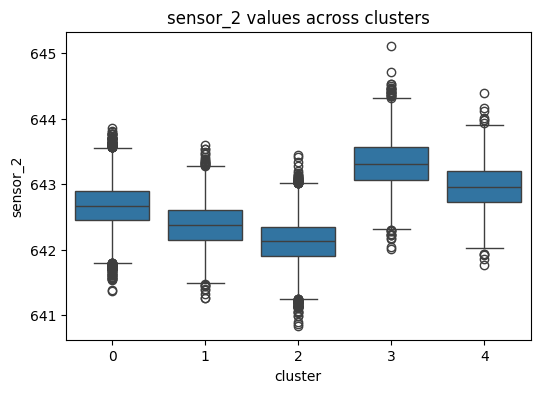

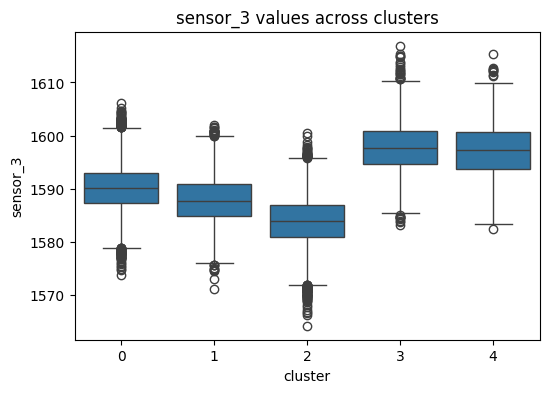

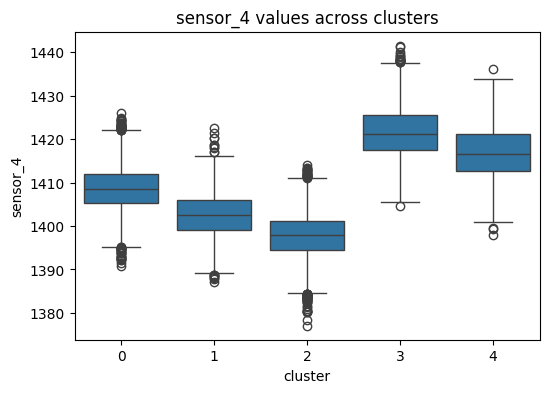

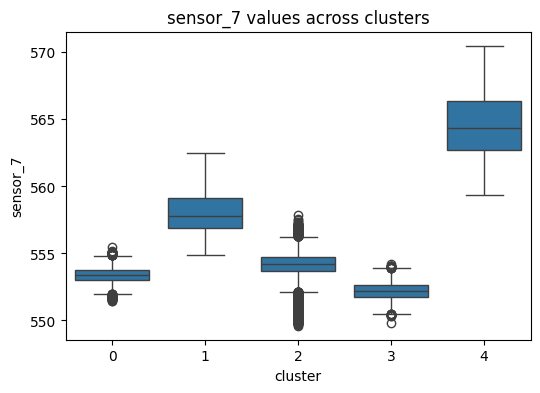

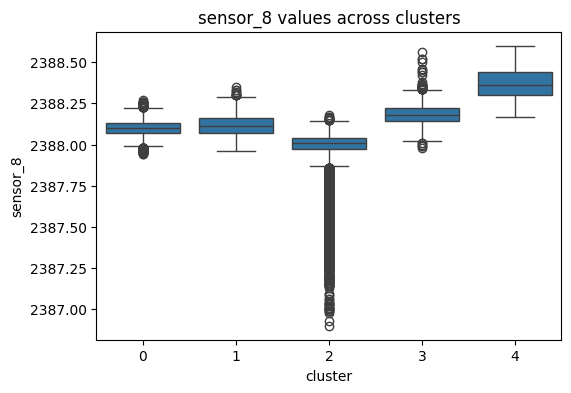

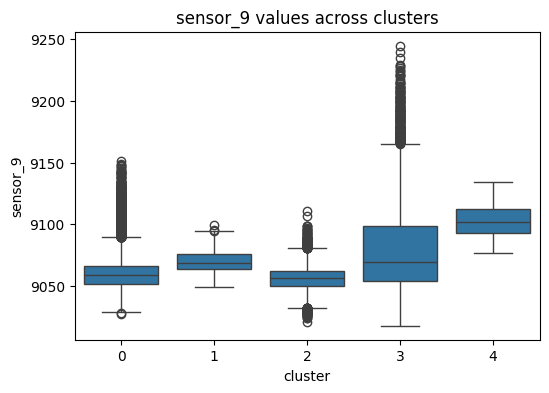

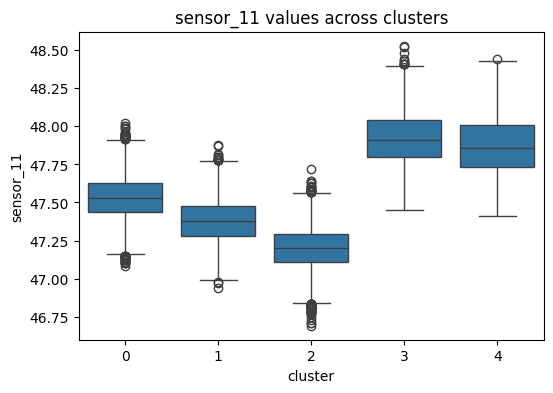

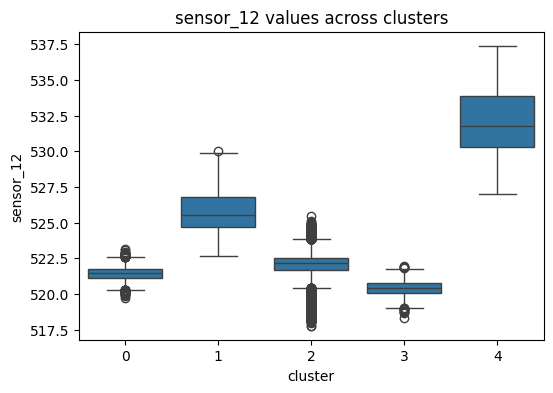

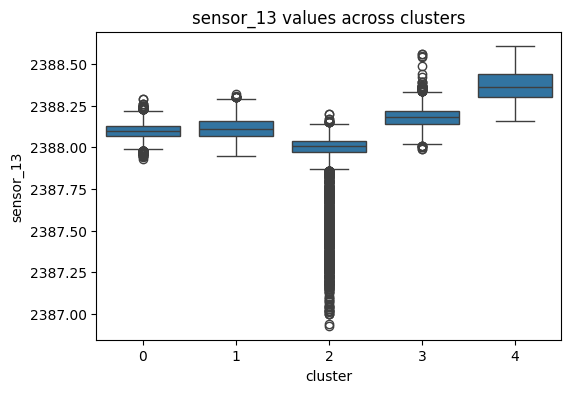

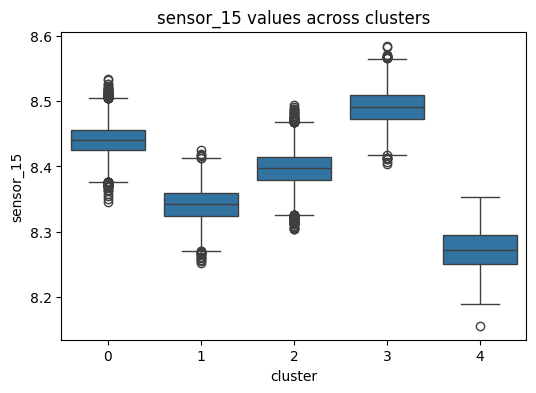

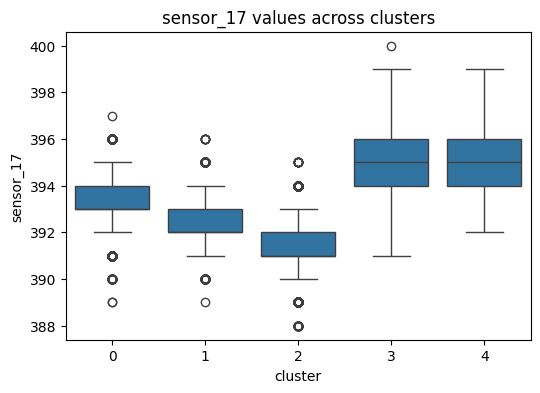

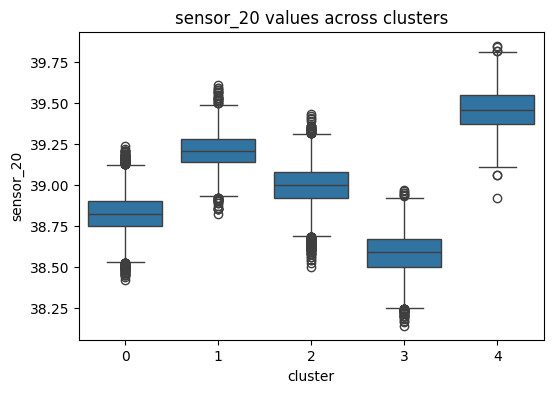

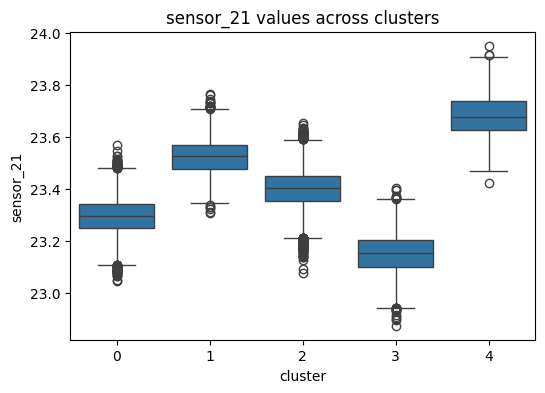

In [ ]:

for sensor in selected_sensors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='cluster', y=sensor)
    plt.title(f"{sensor} values across clusters")
    plt.show()


In [ ]:
mapping = {
    0: 1,
    1: 2,
    2: 0,
    3: 4,
    4: 3
}
df['degradation_stage'] = df['cluster'].map(mapping)

df

,unit,time,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,dataset,cluster,degradation_stage
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001,2,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,FD001,0,1
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001,2,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,FD001,2,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,FD001,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45346,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8.5036,0.03,394,2388,100.0,38.44,22.9631,FD003,3,4
45347,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8.5174,0.03,395,2388,100.0,38.50,22.9746,FD003,3,4
45348,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8.5223,0.03,396,2388,100.0,38.39,23.0682,FD003,3,4
45349,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8.5148,0.03,395,2388,100.0,38.31,23.0753,FD003,3,4


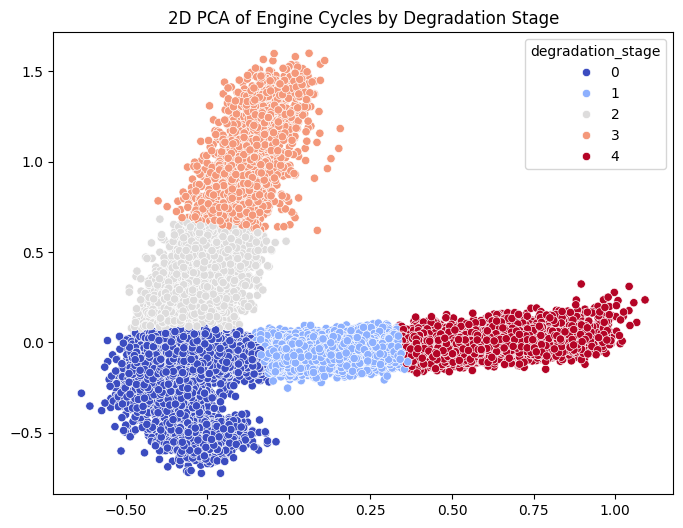

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=df['degradation_stage'], palette='coolwarm')
plt.title("2D PCA of Engine Cycles by Degradation Stage")
plt.show()


Classification Report:
                     precision    recall  f1-score   support

           Critical       0.99      0.95      0.97      1362
            Failure       0.97      0.96      0.96       365
Moderately Degraded       0.96      0.97      0.97      3226
             Normal       0.96      0.97      0.96      3308
  Slightly Degraded       0.95      0.93      0.94       810

           accuracy                           0.96      9071
          macro avg       0.96      0.95      0.96      9071
       weighted avg       0.96      0.96      0.96      9071



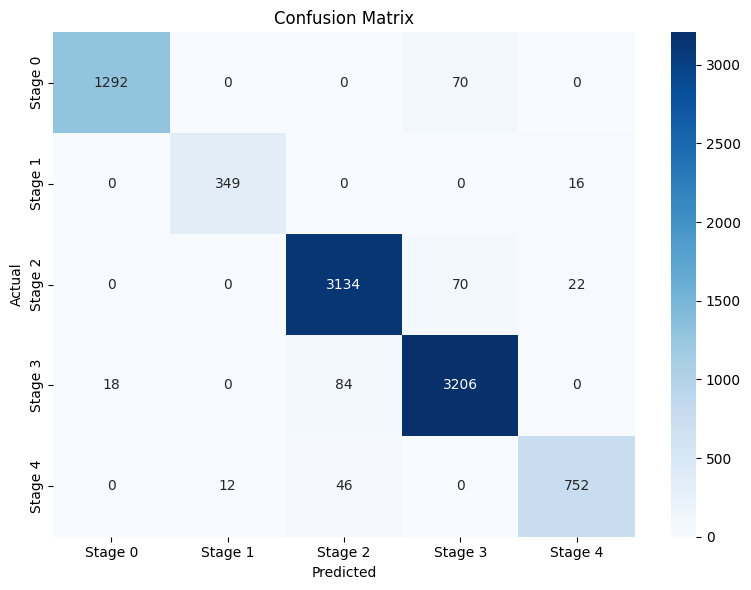

<ipython-input-48-cd4ba7b2d761>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Sensor", palette="viridis")


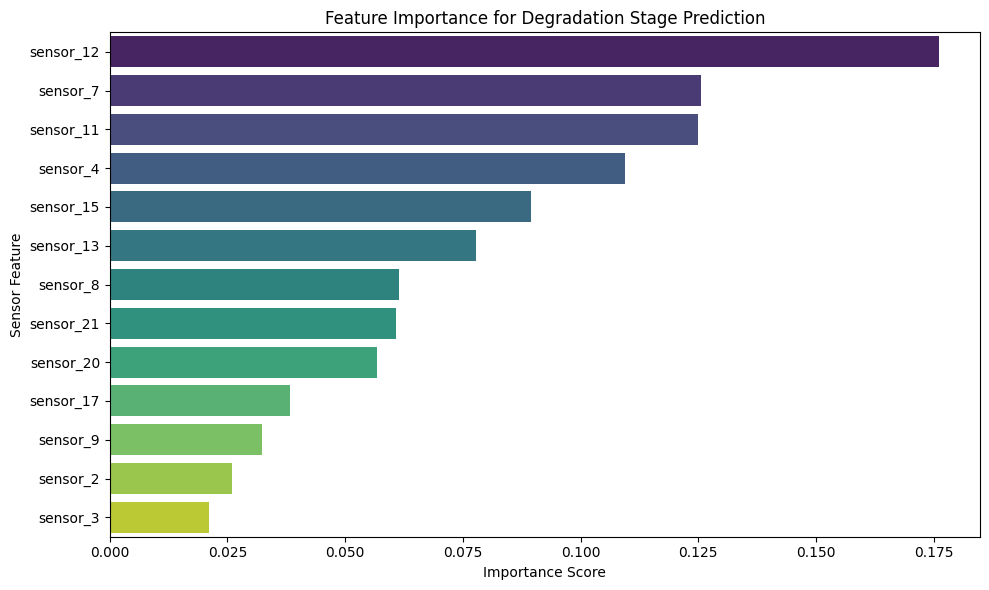

In [ ]:

# Phase 2: Classification Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


#  Select features and target
sensor_cols = selected_sensors
X = df[sensor_cols]
y = df['degradation_stage']  # Target: 0–4 stages

#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/Test split (Stratify to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  Initialize and train the classifier
clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)
clf.fit(X_train, y_train)

#  Predict on test set
y_pred = clf.predict(X_test)

#  Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(5)],
            yticklabels=[f'Stage {i}' for i in range(5)])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

importances = clf.feature_importances_

# Create DataFrame
feature_df = pd.DataFrame({
    "Sensor": sensor_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Sensor", palette="viridis")
plt.title("Feature Importance for Degradation Stage Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Sensor Feature")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sensor_cols = selected_sensors
# Sort data per engine and cycle
df = df.sort_values(by=['unit', 'time']).reset_index(drop=True)

# Initialize target column
df["time_to_next_stage"] = np.nan

# Compute time to next degradation stage
for unit in df["unit"].unique():
    unit_df = df[df["unit"] == unit]
    for idx in unit_df.index:
        current_stage = df.loc[idx, "degradation_stage"]
        future = unit_df.loc[idx + 1:]
        # Find first row with a higher stage
        next_rows = future[future["degradation_stage"] > current_stage]
        if not next_rows.empty:
            time_left = next_rows.iloc[0]["time"] - df.loc[idx, "time"]
            df.loc[idx, "time_to_next_stage"] = time_left

# Drop rows with no label (already in final stage)
df = df.dropna(subset=["time_to_next_stage"])
df

,unit,time,op1,op2,op3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,dataset,degradation_stage,time_to_next_stage
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,FD001,Moderately Degraded,1.0
1,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,FD003,Moderately Degraded,1.0
3,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,FD003,Moderately Degraded,11.0
4,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,FD001,Moderately Degraded,10.0
5,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,FD003,Moderately Degraded,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45307,100,157,0.0020,-0.0002,100.0,518.67,643.17,1595.25,1417.47,14.62,...,8.4383,0.03,394,2388,100.0,38.65,23.2264,FD001,Critical,5.0
45308,100,158,0.0014,-0.0002,100.0,518.67,643.47,1595.56,1408.43,14.62,...,8.4588,0.03,395,2388,100.0,38.81,23.1768,FD001,Critical,4.0
45309,100,159,-0.0011,0.0002,100.0,518.67,643.33,1594.51,1424.49,14.62,...,8.4446,0.03,393,2388,100.0,38.59,23.3186,FD001,Critical,3.0
45310,100,160,0.0010,0.0001,100.0,518.67,643.15,1597.87,1416.23,14.62,...,8.4628,0.03,395,2388,100.0,38.62,23.1095,FD001,Critical,2.0


Random Forest Regressor - MAE: 26.465105409705647, RMSE: 45.39682513347912, R²: 0.20945789142931714


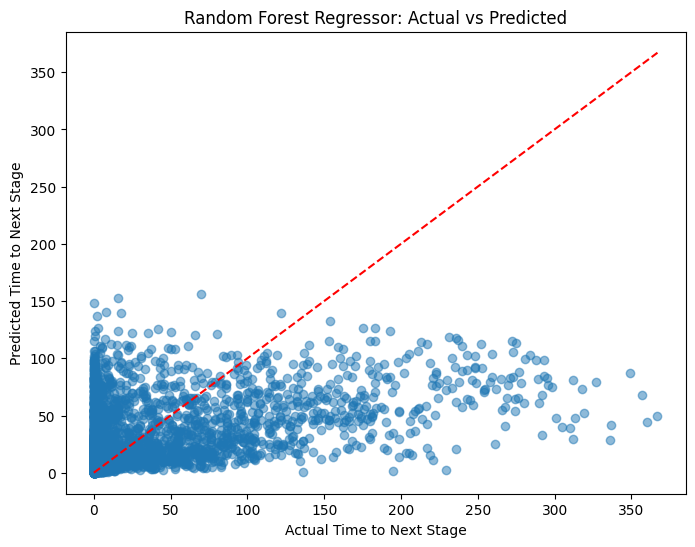

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define feature columns (sensor readings)
X = df[sensor_cols]
y = df['time_to_next_stage']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model using MAE, RMSE, and R²
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual Time to Next Stage")
plt.ylabel("Predicted Time to Next Stage")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.show()


Ridge Regression - MAE: 31.286262785590377, RMSE: 50.5021093076638, R²: 0.021652632938519267


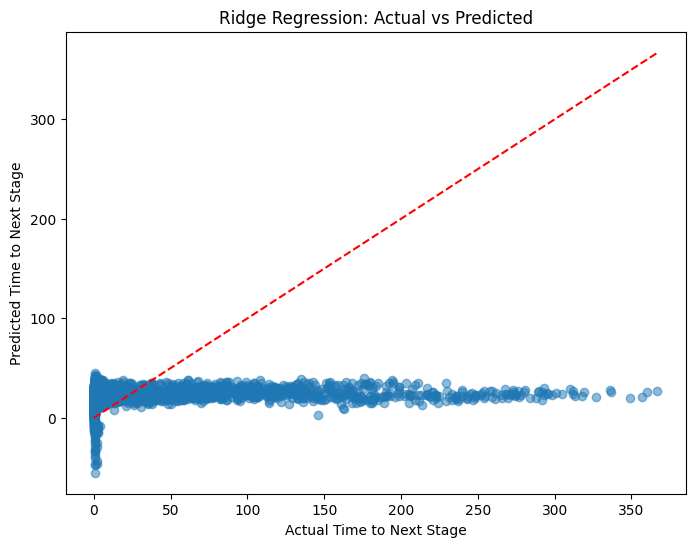

In [ ]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_regressor.predict(X_test)

# Evaluate the model using MAE, RMSE, and R²
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual Time to Next Stage")
plt.ylabel("Predicted Time to Next Stage")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVR

# Initialize SVR model (use any kernel, e.g., 'rbf')
svr_model = SVR(kernel='rbf')

# Fit on scaled data
svr_model.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model using MAE, RMSE, and R²
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR_Regression - MAE : {mae_svr} , RMSE : {rmse_svr} , R2 - {r2_svr}")



SVR_Regression - MAE : 22.217766453098868 , RMSE : 53.66652809666436 , R2 - -0.10479333442326455


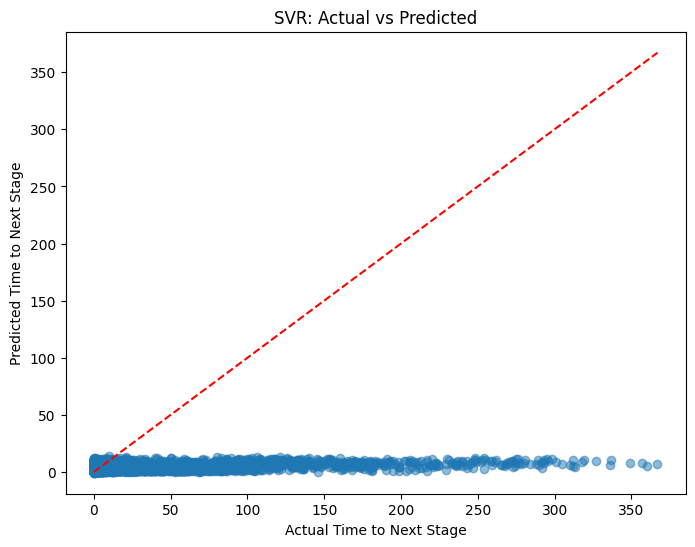

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')  # Diagonal reference line
plt.xlabel("Actual Time to Next Stage")
plt.ylabel("Predicted Time to Next Stage")
plt.title("SVR: Actual vs Predicted")
plt.show()


In [ ]:
evaluation_report = pd.DataFrame({
    'Model': ['Random Forest', 'Ridge','SVR'],
    'MAE': [mae_rf, mae_ridge,mae_svr],
    'RMSE': [rmse_rf, rmse_ridge,rmse_svr],
    'R²': [r2_rf, r2_ridge,r2_svr]
})
print(evaluation_report)

           Model        MAE       RMSE        R²
0  Random Forest  26.465105  45.396825  0.209458
1          Ridge  31.286263  50.502109  0.021653
2            SVR  22.217766  53.666528 -0.104793


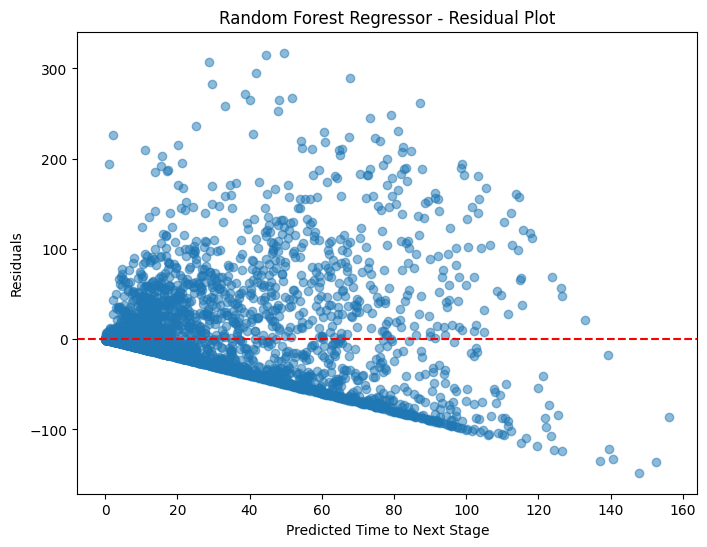

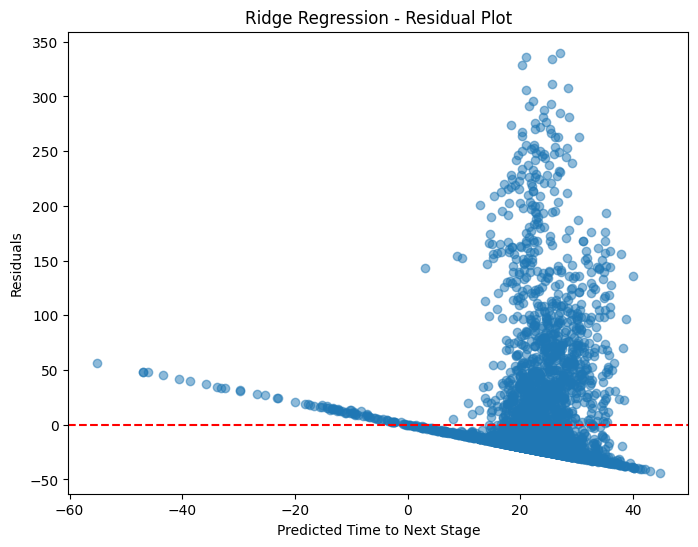

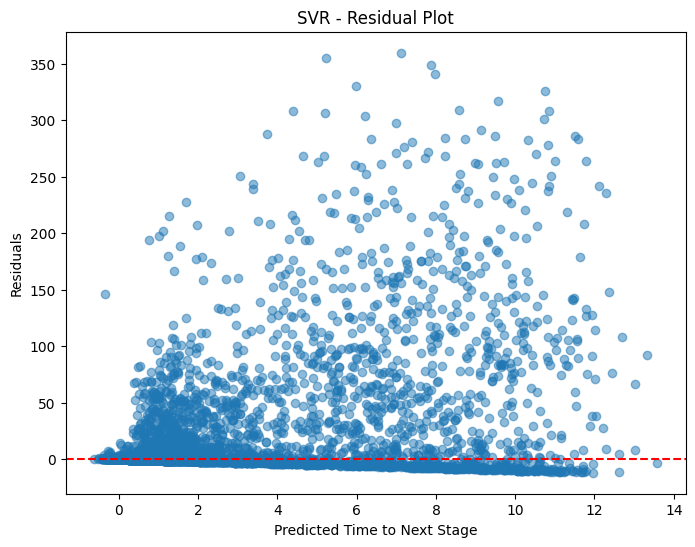

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Residual Plot for Random Forest
residual_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residual_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Time to Next Stage")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor - Residual Plot")
plt.show()

# Residual Plot for Ridge Regression
residual_ridge = y_test - y_pred_ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, residual_ridge, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Time to Next Stage")
plt.ylabel("Residuals")
plt.title("Ridge Regression - Residual Plot")
plt.show()

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVR on scaled data
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

# Residual Plot for SVR
residual_svr = y_test - y_pred_svr
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_svr, residual_svr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Time to Next Stage")
plt.ylabel("Residuals")
plt.title("SVR - Residual Plot")
plt.show()


['Critical' 'Failure' 'Moderately Degraded' 'Normal']
⚠️ Maintenance Alert! Engine: 9, Time: 331, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 46, Time: 201, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 46, Time: 202, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 11, Time: 176, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 49, Time: 212, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 2, Time: 239, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 2, Time: 227, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 11, Time: 180, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 94, Time: 319, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 84, Time: 197, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 72, Time: 197, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 77, Time: 204, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 2, Time: 225, Risk Score: 0.990
⚠️ Maintenance Alert! Engine: 11, Time: 191, Risk Score: 1.000
⚠️ Maintenance Alert! Engine: 71, Time: 370, Risk Score: 0.930
⚠️ Ma

<ipython-input-63-c67cc46e166f>:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


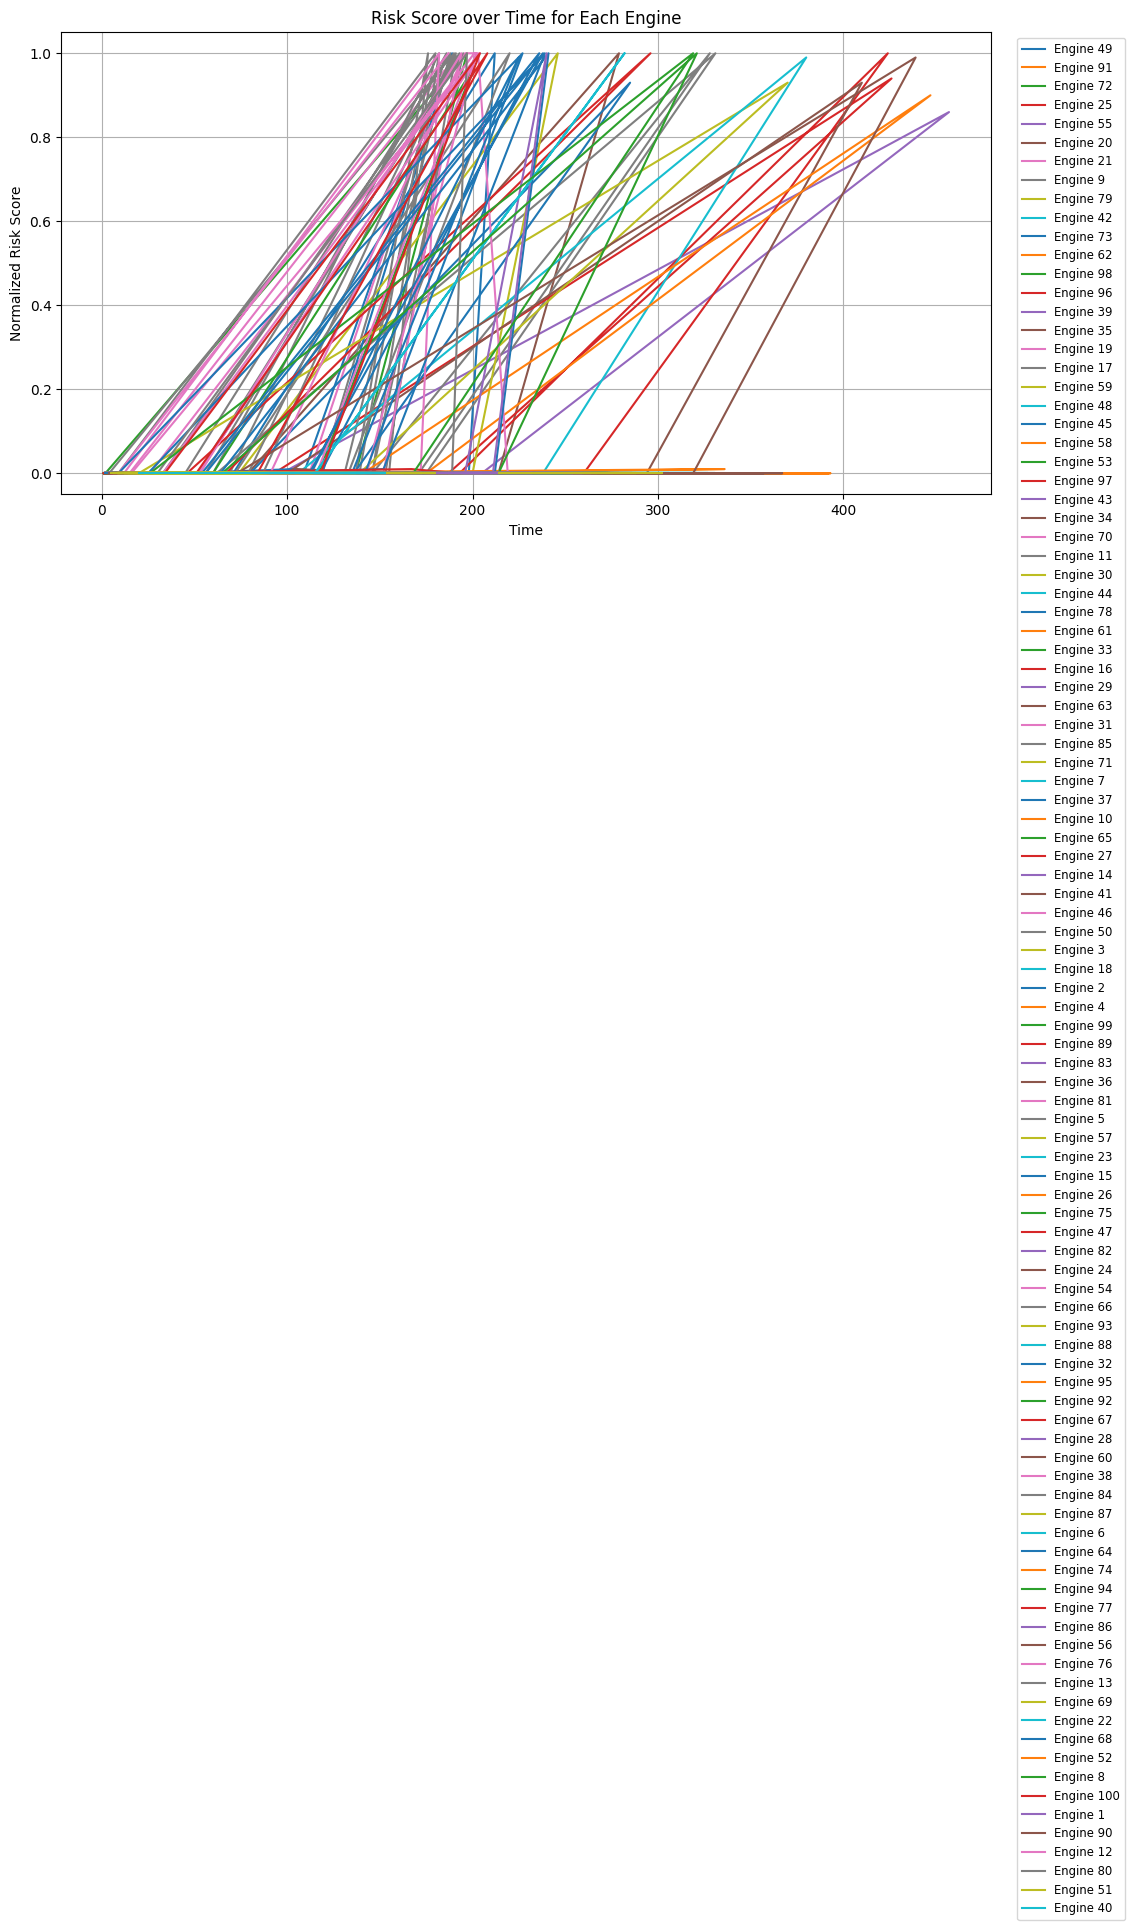

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

# Assume these are trained models
# clf -> Classifier (e.g., LogisticRegression, XGBoost, etc.)
# svr_regressor -> Regression model (e.g., SVR)
# X_test -> Test features
# df_test -> Original test dataframe containing 'unit', 'time', and 'degradation_stage' columns

# --- Predict failure probability (Stage 4 = "Failure") ---

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


sensor_cols = ["sensor_2", "sensor_3", "sensor_4", "sensor_7", "sensor_8", "sensor_9", "sensor_11", "sensor_12", "sensor_13", "sensor_15", "sensor_17", "sensor_20", "sensor_21"]

X_train = df_train[sensor_cols].values
X_test = df_test[sensor_cols].values
X_test_df = pd.DataFrame(X_test, columns=sensor_cols)
X_train_df = pd.DataFrame(X_train, columns=sensor_cols)

y_train_class = df_train["degradation_stage"]
df_last = df_test.groupby("unit").last().reset_index()
# Confirm classifier is trained
print(clf.classes_)  # Check if "Failure" is present

# Make sure column match
assert list(X_test_df.columns) == list(X_train_df.columns)

#retraining
clf.fit(X_train_df, y_train_class)

# Predict failure probabilities
failure_index = list(clf.classes_).index("Failure")  # Only if "Failure" is a class
failure_probabilities = clf.predict_proba(X_test_df)[:, failure_index]

# --- Predict remaining useful life (time left to failure) ---
time_left = rf_regressor.predict(X_test)

# --- Compute Raw Risk Score ---
raw_risk_score = failure_probabilities * time_left

# --- Normalization 1: Min-Max ---
min_score = raw_risk_score.min()
max_score = raw_risk_score.max()
normalized_risk_score = (raw_risk_score - min_score) / (max_score - min_score + 1e-6)

# --- Normalization 2: Urgency-Based Inversion ---
urgency_risk_score = failure_probabilities / (time_left + 1e-6)


   # --- Set fixed threshold for issuing alerts ---
threshold = 0.7

# --- Issue maintenance alerts based on normalized risk score ---
for i in range(len(normalized_risk_score)):
    if normalized_risk_score[i] > threshold:
        unit = df_test.iloc[i]['unit'] if 'unit' in df_test.columns else f"Sample {i}"
        time = df_test.iloc[i]['time'] if 'time' in df_test.columns else "Unknown Time"
        print(f"⚠️ Maintenance Alert! Engine: {unit}, Time: {time}, Risk Score: {normalized_risk_score[i]:.3f}")

# --- Plot Risk Score Over Time for Each Engine ---
plt.figure(figsize=(12, 6))
for unit in df_test['unit'].unique():
    unit_mask = df_test['unit'] == unit
    plt.plot(df_test.loc[unit_mask, "time"], normalized_risk_score[unit_mask], label=f"Engine {unit}")

plt.xlabel("Time")
plt.ylabel("Normalized Risk Score")
plt.title("Risk Score over Time for Each Engine")
plt.grid(True)
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1), ncol=1, fontsize="small")
plt.tight_layout()
plt.show()
